# Aula 8: Técnicas de Pré-processamento de Imagens



# Introdução ao Pré-processamento de Imagens

O pré-processamento é o primeiro passo crítico no fluxo de trabalho de visão computacional e aprendizado profundo, onde preparamos as imagens para modelagem.

## Definição de Pré-processamento de Imagens

Pré-processamento de imagens é um termo abrangente para várias técnicas aplicadas às imagens antes de serem usadas como entrada em algoritmos de aprendizado de máquina e visão computacional. Estas técnicas podem incluir transformações simples como redimensionamento e normalização, até operações mais complexas como aumento de dados e filtragem de ruído.

- **O que isso significa?**
  - Em termos simples, o pré-processamento de imagens ajusta as imagens em um formato padrão e melhora sua qualidade para garantir que os algoritmos de aprendizado de máquina possam interpretá-las de maneira mais eficaz.

## Importância do Pré-processamento de Imagens

O pré-processamento não só ajuda a padronizar as entradas para nossos modelos, mas também melhora significativamente a qualidade das previsões de um modelo. Vamos discutir as principais razões da importância do pré-processamento de imagens:

### Melhoria da Qualidade das Imagens

- **Por que isso é importante?**
  - A qualidade de uma imagem pode diretamente influenciar como um algoritmo percebe e entende essa imagem. Imagens de alta qualidade com características importantes bem destacadas podem ajudar algoritmos a aprender melhor e mais rápido.

### Redução de Variabilidade

- **O que significa variabilidade?**
  - Variabilidade refere-se às diferenças que podem existir entre imagens no mesmo conjunto de dados. Isso pode incluir variações em tamanho, cor, iluminação, e ângulo de visão.
- **Por que reduzir a variabilidade?**
  - Reduzir a variabilidade ajuda a minimizar as diferenças irrelevantes para o aprendizado do modelo, permitindo que ele se concentre nas características essenciais.

### Destaque de Características Importantes

- **Como destacamos características importantes?**
  - Utilizando técnicas específicas de pré-processamento, podemos realçar detalhes que são cruciais para o problema em questão. Por exemplo, em uma tarefa de reconhecimento facial, poderíamos enfatizar os contornos do rosto ou os olhos.

# Técnicas de Pré-processamento de Imagens

## 1. Redimensionamento de Imagens

### Objetivo
O objetivo do redimensionamento de imagens é padronizar todas as imagens para terem o mesmo tamanho antes de serem inseridas na rede neural. Isso é crucial porque a maioria das arquiteturas de rede neural, especialmente as Redes Neurais Convolucionais (CNNs), requer que todas as entradas tenham as mesmas dimensões. Além disso, imagens de tamanhos uniformes permitem que o modelo de aprendizado de máquina processe os dados de maneira mais eficiente e eficaz.

### Métodos Comuns de Redimensionamento
O redimensionamento pode ser realizado utilizando diferentes técnicas de interpolação. Cada método tem suas características próprias e é escolhido com base no tipo de dados e no requisito do projeto. Os métodos mais comuns incluem:

#### Interpolação Bilinear
- **Como funciona:** Este método considera os quatro pontos de dados mais próximos do ponto estimado e utiliza uma média ponderada para calcular o valor interpolado. É relativamente rápido e fornece bons resultados para a maioria das aplicações.

#### Interpolação Bicúbica
- **Como funciona:** A interpolação bicúbica é um passo adiante em relação à interpolação bilinear, considerando 16 pontos próximos (em vez de 4) para uma aproximação mais refinada. Embora seja computacionalmente mais intensiva, ela tende a manter melhor as características da imagem, especialmente em termos de suavidade das bordas.

### Escolha do Método
A escolha entre interpolação bilinear e bicúbica geralmente depende de uma compensação entre qualidade de imagem e velocidade de processamento. Para aplicações em tempo real onde a velocidade é crítica, a interpolação bilinear pode ser a melhor escolha. Por outro lado, para aplicações onde a qualidade da imagem é mais crítica, a interpolação bicúbica pode ser preferida.

In [4]:
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
import cv2
import matplotlib.pyplot as plt

def ler_imagem(caminho_imagem):
    """
    Esta função lê uma imagem de um caminho de arquivo e retorna como um array numpy.
    A imagem é lida no formato de cor.

    Args:
    caminho_imagem (str): O caminho do arquivo da imagem.

    Returns:
    numpy.ndarray: O array da imagem no espaço de cor BGR (Azul, Verde, Vermelho).
    """
    # Lê a imagem usando o OpenCV
    imagem = cv2.imread(caminho_imagem)
    if imagem is None:
        raise ValueError("Imagem não encontrada ou o caminho está incorreto")
    
    return imagem

def redimensionar_imagem_bilinear(caminho_imagem, dimensoes=(256, 256)):
    """
    Esta função redimensiona uma imagem usando o método de interpolação bilinear.
    
    Args:
    caminho_imagem (str): O caminho do arquivo da imagem.
    dimensoes (tuple): O tamanho alvo da imagem redimensionada (largura, altura).
    
    Returns:
    numpy.ndarray: A imagem redimensionada.
    """
    # Primeiro, lê a imagem do caminho fornecido
    imagem = ler_imagem(caminho_imagem)
    
    # Redimensiona a imagem usando interpolação bilinear
    imagem_redimensionada = cv2.resize(imagem, dimensoes, interpolation=cv2.INTER_LINEAR)
    
    # Plota as imagens original e redimensionada para comparação
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Redimensionada (Bilinear)')
    plt.show()
    
    return imagem_redimensionada

def redimensionar_imagem_bicubica(caminho_imagem, dimensoes=(256, 256)):
    """
    Esta função redimensiona uma imagem usando o método de interpolação bicúbica.
    
    Args:
    caminho_imagem (str): O caminho do arquivo da imagem.
    dimensoes (tuple): O tamanho alvo da imagem redimensionada (largura, altura).
    
    Returns:
    numpy.ndarray: A imagem redimensionada.
    """
    # Primeiro, lê a imagem do caminho fornecido
    imagem = ler_imagem(caminho_imagem)
    
    # Redimensiona a imagem usando interpolação bicúbica
    imagem_redimensionada = cv2.resize(imagem, dimensoes, interpolation=cv2.INTER_CUBIC)
    
    # Plota as imagens original e redimensionada para comparação
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Redimensionada (Bicúbica)')
    plt.show()
    
    return imagem_redimensionada

In [6]:
# Defina o caminho para o arquivo de imagem aqui
caminho_imagem = "imagens/pica_pau.jpeg"

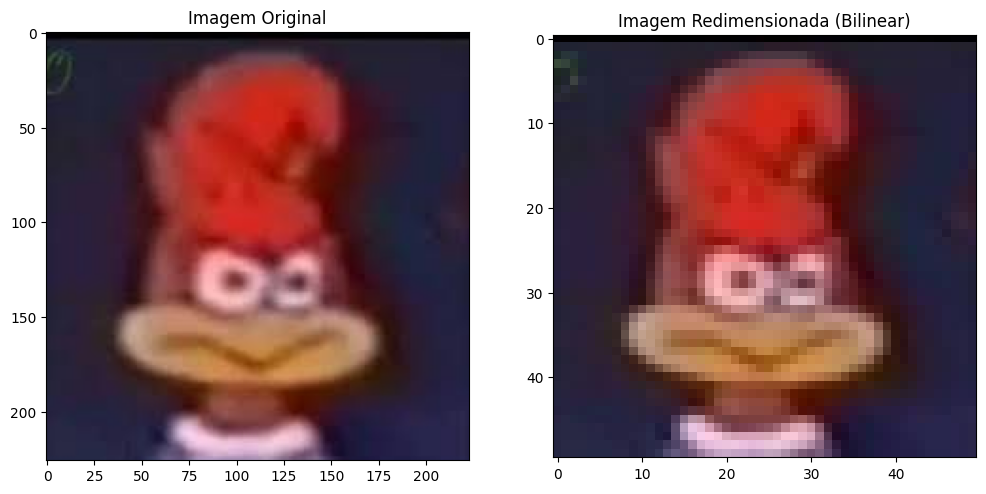

CPU times: total: 562 ms
Wall time: 3.05 s


In [7]:
%%time
imagem_bilinear = redimensionar_imagem_bilinear(caminho_imagem, (50,50))

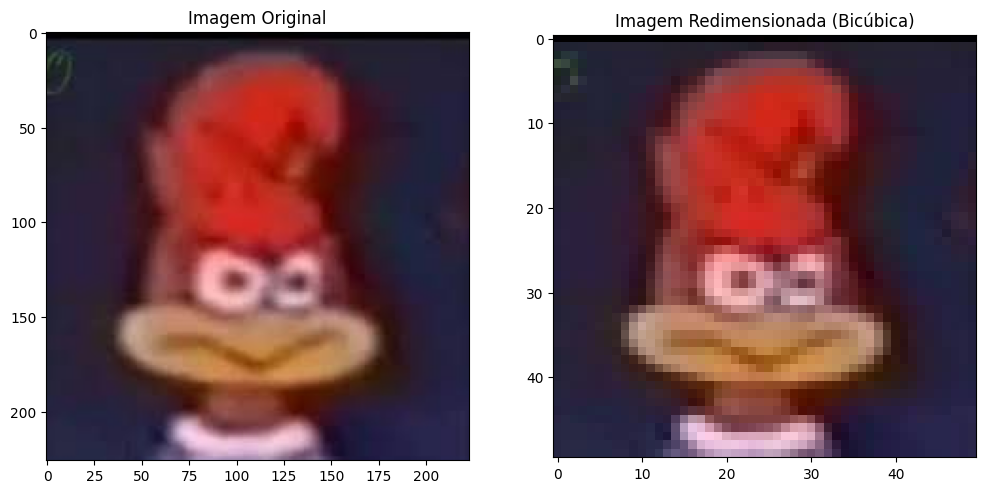

CPU times: total: 500 ms
Wall time: 942 ms


In [8]:
%%time
imagem_bicubica = redimensionar_imagem_bicubica(caminho_imagem, (50,50))

In [9]:
# Defina o caminho para o arquivo de imagem aqui
caminho_imagem = "imagens/naruto.jpg"

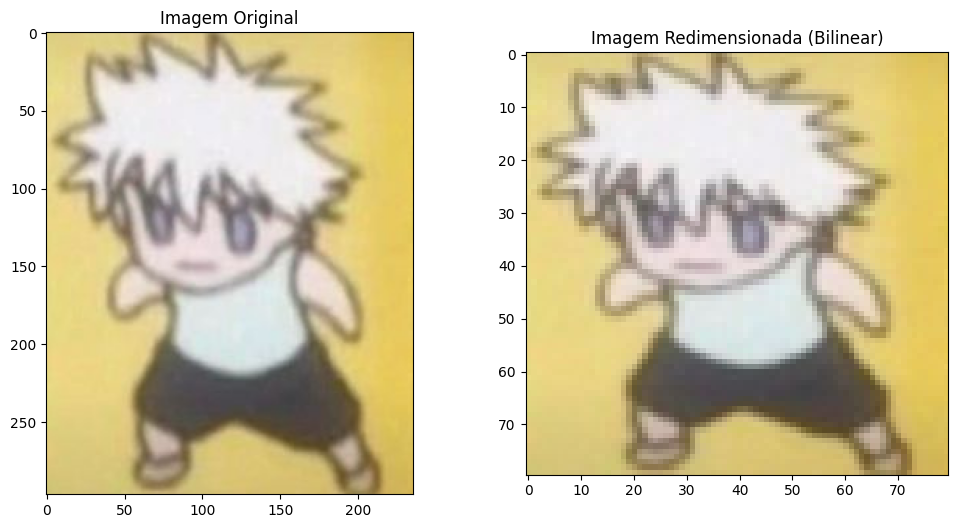

CPU times: total: 688 ms
Wall time: 818 ms


In [10]:
%%time
imagem_bilinear = redimensionar_imagem_bilinear(caminho_imagem, (80,80))

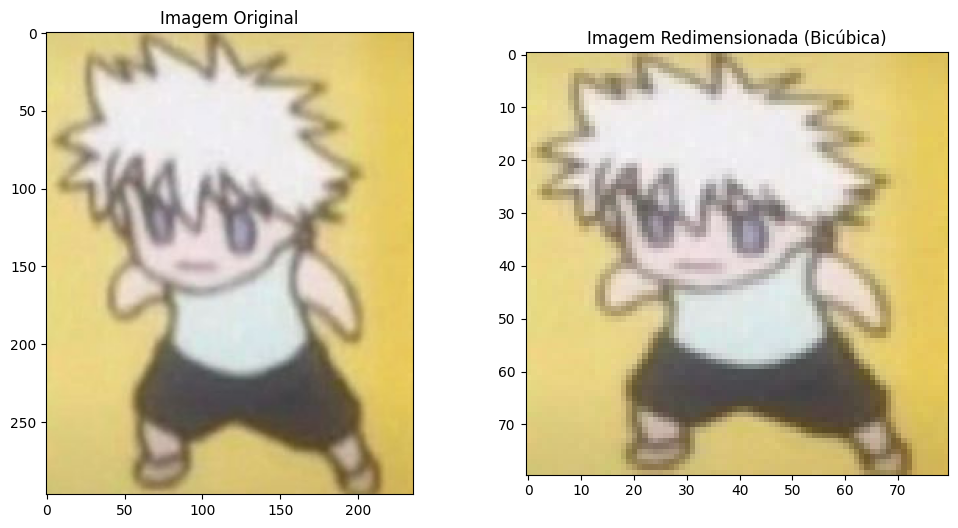

CPU times: total: 609 ms
Wall time: 716 ms


In [11]:
%%time
imagem_bicubica = redimensionar_imagem_bicubica(caminho_imagem, (80,80))

In [12]:
# Defina o caminho para o arquivo de imagem aqui
caminho_imagem = "imagens/paisagem.jpg"

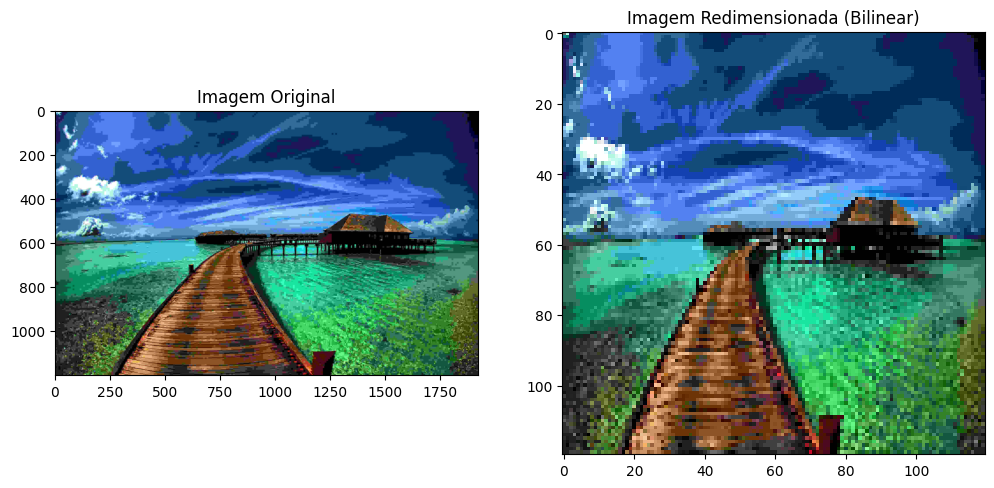

CPU times: total: 812 ms
Wall time: 1.03 s


In [13]:
%%time
imagem_bilinear = redimensionar_imagem_bilinear(caminho_imagem, (120,120))

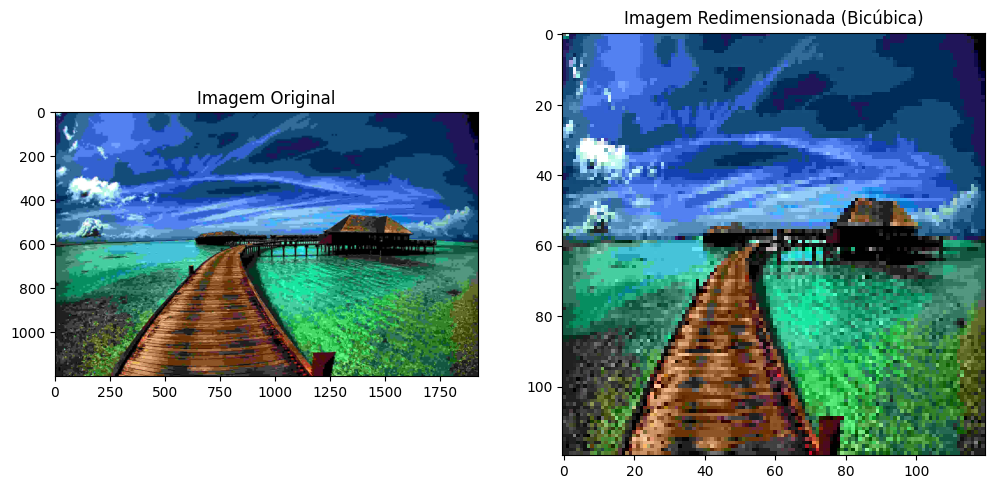

CPU times: total: 844 ms
Wall time: 979 ms


In [14]:
%%time
imagem_bicubica = redimensionar_imagem_bicubica(caminho_imagem, (120,120))

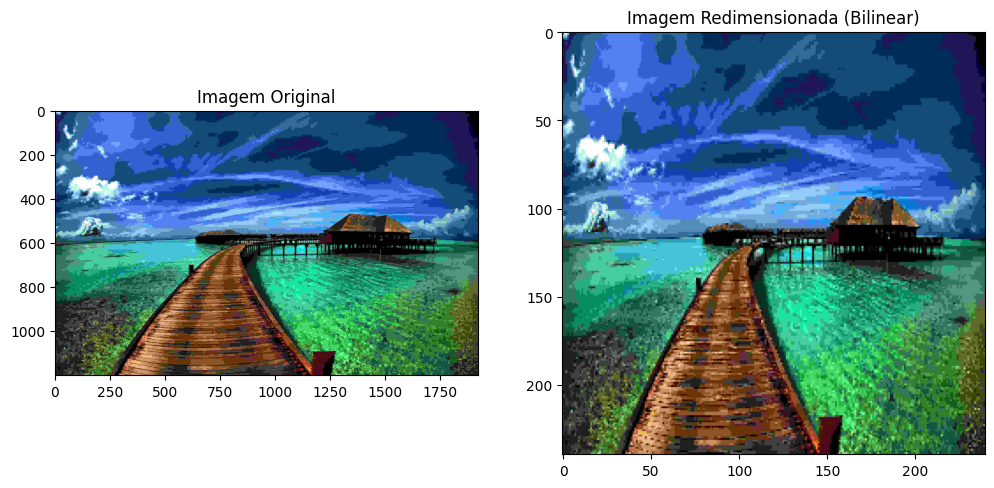

CPU times: total: 891 ms
Wall time: 888 ms


In [15]:
%%time
imagem_bilinear = redimensionar_imagem_bilinear(caminho_imagem, (240,240))

## 2. Normalização e Padronização

### Objetivos
Normalização e padronização são duas técnicas fundamentais de pré-processamento que ajudam a modificar os valores dos pixels das imagens para uma escala comum. Isso é crucial para que os modelos de deep learning, como as CNNs, processem os dados de maneira uniforme e eficaz.

### Normalização (Min-Max Scaling)

#### Descrição
A normalização ajusta a escala dos dados de pixel para um intervalo padrão, geralmente 0 a 1. Isso é feito para garantir que os modelos não se tornem tendenciosos para certas características apenas por causa da variação nas escalas dos dados.

- **Método:**
  - Cada pixel da imagem é dividido pelo valor máximo possível (255 no caso de imagens RGB), transformando todos os valores para um intervalo entre 0 e 1.
  
#### Benefícios
- Facilita a convergência do algoritmo durante o treinamento, pois os gradientes são mais estáveis.
- Reduz a dominância de características com valores numéricos mais altos sobre aqueles com valores baixos.

### Padronização (Z-score Normalization)

#### Descrição
A padronização envolve redimensionar os dados para terem uma média (μ) de 0 e um desvio padrão (σ) de 1. Este método é também conhecido como Z-score normalization.

- **Método:**
  - A média dos valores de pixel é subtraída de cada pixel e o resultado é então dividido pelo desvio padrão dos valores de pixel. Isso é feito para cada canal de cor independente.
  
#### Benefícios
- Torna os dados mais consistentes e normalizados, permitindo que o modelo não seja sensível a pequenas flutuações nos dados de entrada.
- Melhora a eficiência do algoritmo de otimização (como o gradiente descendente) ao manter todos os atributos na mesma escala.

### Quando usar cada um?

- **Normalização** é geralmente usada quando sabemos os valores mínimos e máximos possíveis dos dados (como pixels de uma imagem). É muito comum em imagens, pois limita os valores de pixel a um intervalo fixo [0, 1].
  
- **Padronização** pode ser mais apropriada quando os dados têm uma distribuição que é aproximadamente normal, mas os extremos são importantes ou quando não conhecemos os valores de escala mínima e máxima dos dados.


Ambas as técnicas são essenciais no pré-processamento de dados para redes neurais, ajudando a normalizar ou estandardizar as variações nos dados de entrada. A escolha entre normalização e padronização depende do tipo de dados e do modelo de rede neural que está sendo utilizado. Estas técnicas garantem que o modelo seja justo e não tendencioso em relação à escala dos dados, facilitando o processo de aprendizado e melhorando a performance geral.


In [16]:
import numpy as np
import matplotlib.pyplot as plt


def normalizar_imagem(caminho_imagem):
    """
    Esta função aplica a normalização Min-Max à imagem, escalando os pixels
    para o intervalo [0, 1].

    Args:
    caminho_imagem (str): Caminho para o arquivo de imagem.

    Returns:
    numpy.ndarray: A imagem normalizada.
    """
    # Primeiro, lê a imagem do caminho fornecido
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Converte a imagem para float para evitar problemas de tipo
    imagem = imagem.astype(np.float32)
    
    # Aplica a normalização Min-Max
    imagem_normalizada = imagem / 255.0
    
    # Exibe a imagem normalizada
    plt.imshow(imagem_normalizada)
    plt.title('Imagem Normalizada')
    plt.axis('off')  # Desliga os eixos
    plt.show()
    
    return imagem_normalizada

def padronizar_imagem(caminho_imagem):
    """
    Esta função aplica a padronização Z-score à imagem, ajustando os pixels
    para terem média zero e desvio padrão um.

    Args:
    caminho_imagem (str): Caminho para o arquivo de imagem.

    Returns:
    numpy.ndarray: A imagem padronizada.
    """
    # Primeiro, lê a imagem do caminho fornecido
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Converte a imagem para float para facilitar cálculos
    imagem = imagem.astype(np.float32)
    
    # Calcula a média e o desvio padrão da imagem
    media = np.mean(imagem)
    desvio_padrao = np.std(imagem)
    
    # Aplica a padronização Z-score
    imagem_padronizada = (imagem - media) / desvio_padrao
    
    # Exibe a imagem padronizada
    plt.imshow(imagem_padronizada)
    plt.title('Imagem Padronizada')
    plt.axis('off')  # Desliga os eixos
    plt.show()
    
    return imagem_padronizada

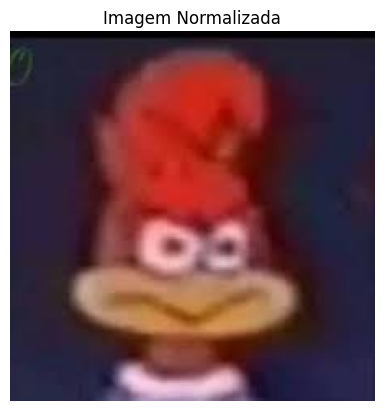

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


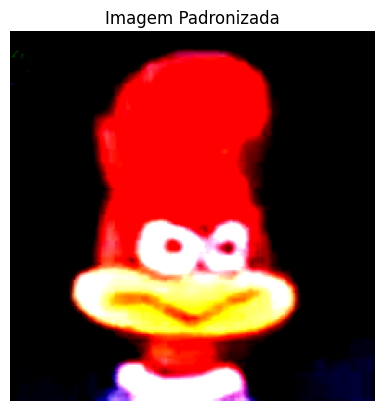

In [17]:
# Exemplo de uso:
caminho_imagem = 'imagens/pica_pau.jpeg'
imagem_normalizada = normalizar_imagem(caminho_imagem)
imagem_padronizada = padronizar_imagem(caminho_imagem)

## 3. Aumento de Dados (Data Augmentation)

### Objetivo
O objetivo do aumento de dados é enriquecer o conjunto de dados de treinamento sem coletar novos dados, aplicando transformações que geram novas imagens a partir das existentes. Esta técnica é essencial para melhorar a robustez e eficácia dos modelos de deep learning, especialmente em situações com conjuntos de dados limitados.

### Técnicas Utilizadas

#### Transformações Geométricas
- **Rotação:** Gira a imagem em um ângulo específico, simulando a variação na orientação do objeto visto.
- **Translação:** Desloca a imagem em direção horizontal ou vertical, ajudando o modelo a não ser sensível à posição do objeto na imagem.
- **Escala:** Altera o tamanho do objeto na imagem, simulando o efeito de objetos sendo mais próximos ou mais distantes da câmera.
- **Espelhamento Horizontal/Vertical:** Inverte a imagem ao longo do eixo horizontal ou vertical, imitando a mudança na perspectiva.

#### Alterações de Iluminação
- Modificações no brilho e contraste das imagens para simular diferentes condições de iluminação.

#### Cortes Aleatórios
- **Cropping:** Corta partes da imagem aleatoriamente, o que pode ajudar o modelo a focar em diferentes características do objeto.

### Benefícios do Aumento de Dados

#### Aumenta a Diversidade do Conjunto de Dados
- Ao introduzir variações nas imagens, o modelo pode aprender a reconhecer os objetos em diversas condições e perspectivas, o que é crucial para tarefas de visão computacional em ambientes reais.

#### Ajuda a Evitar o Overfitting
- O overfitting ocorre quando um modelo aprende detalhes e ruídos no conjunto de dados de treinamento ao ponto de prejudicar a performance em dados novos. Ao expandir artificialmente o conjunto de dados de treinamento, o aumento de dados permite que o modelo generalize melhor, reduzindo o risco de overfitting.

#### Melhora a Generalização do Modelo
- As redes neurais treinadas com mais exemplos podem desenvolver uma melhor generalização. Ao ver várias versões modificadas de uma mesma imagem, o modelo aprende a ignorar variações irrelevantes e a focar nas características essenciais.

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def rotacionar_imagem(caminho_imagem, angulo, metodo_preenchimento=cv2.BORDER_CONSTANT):
    """
    Rotaciona a imagem pelo ângulo especificado e permite escolher o método de preenchimento.
    
    Args:
    caminho_imagem (str): O caminho para o arquivo de imagem.
    angulo (float): O ângulo de rotação em graus.
    metodo_preenchimento (cv2.BORDER_*): Método de preenchimento dos espaços vazios após a rotação.
    
    Returns:
    numpy.ndarray: A imagem rotacionada.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    altura, largura = imagem.shape[:2]
    centro = (largura // 2, altura // 2)
    matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, 1.0)
    imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (largura, altura), borderMode=metodo_preenchimento)
    
    plt.imshow(imagem_rotacionada)
    plt.title(f'Imagem Rotacionada {angulo}°')
    plt.axis('off')
    plt.show()
    
    return imagem_rotacionada

def aplicar_zoom_centralizado(caminho_imagem, fator_zoom):
    """
    Aplica um zoom centralizado na imagem, focando no centro e ampliando.
    Isso cortará as bordas externas se o fator de zoom for maior que 1.
    
    Args:
    caminho_imagem (str): O caminho para o arquivo de imagem.
    fator_zoom (float): Fator de zoom (>1 para zoom in, <1 para zoom out).
    
    Returns:
    numpy.ndarray: A imagem com zoom centralizado aplicado.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    altura, largura = imagem.shape[:2]

    # Primeiro, redimensiona a imagem com o fator de zoom especificado
    nova_largura = int(largura * fator_zoom)
    nova_altura = int(altura * fator_zoom)
    imagem_redimensionada = cv2.resize(imagem, (nova_largura, nova_altura), interpolation=cv2.INTER_CUBIC)

    # Agora, corta o centro da imagem redimensionada para manter o tamanho original
    if fator_zoom >= 1:
        inicio_x = (nova_largura - largura) // 2
        inicio_y = (nova_altura - altura) // 2
        imagem_zoom = imagem_redimensionada[inicio_y:inicio_y + altura, inicio_x:inicio_x + largura]
    else:
        borda_x = (largura - nova_largura) // 2
        borda_y = (altura - nova_altura) // 2
        imagem_zoom = cv2.copyMakeBorder(imagem_redimensionada, top=borda_y, bottom=borda_y, 
                                         left=borda_x, right=borda_x, borderType=cv2.BORDER_CONSTANT, 
                                         value=[0, 0, 0])

    plt.imshow(imagem_zoom)
    plt.title(f'Imagem com Zoom Centralizado {fator_zoom:.2f}x')
    plt.axis('off')
    plt.show()

    return imagem_zoom




def espelhar_imagem(caminho_imagem, horizontal=True):
    """
    Aplica espelhamento horizontal ou vertical na imagem.
    
    Args:
    caminho_imagem (str): O caminho para o arquivo de imagem.
    horizontal (bool): Se True, aplica espelhamento horizontal; se False, vertical.
    
    Returns:
    numpy.ndarray: A imagem espelhada.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    # Aplica espelhamento
    if horizontal:
        imagem_espelhada = cv2.flip(imagem, 1)
        titulo = 'Horizontalmente Espelhada'
    else:
        imagem_espelhada = cv2.flip(imagem, 0)
        titulo = 'Verticalmente Espelhada'
    
    plt.imshow(imagem_espelhada)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
    return imagem_espelhada

In [19]:
# Exemplo de uso
caminho_imagem = 'imagens/pica_pau.jpeg'

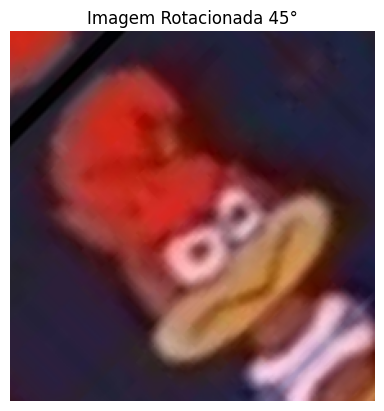

In [20]:
imagem_rotacionada = rotacionar_imagem(caminho_imagem, 45, metodo_preenchimento=cv2.BORDER_REFLECT)

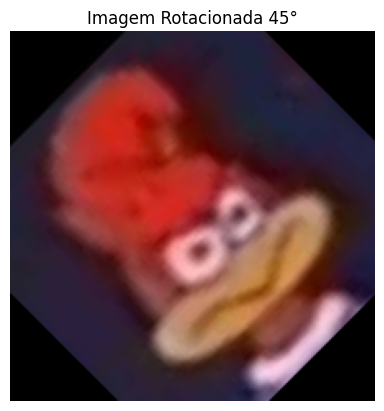

In [21]:
imagem_rotacionada_constante = rotacionar_imagem(caminho_imagem, 45, metodo_preenchimento=cv2.BORDER_CONSTANT)

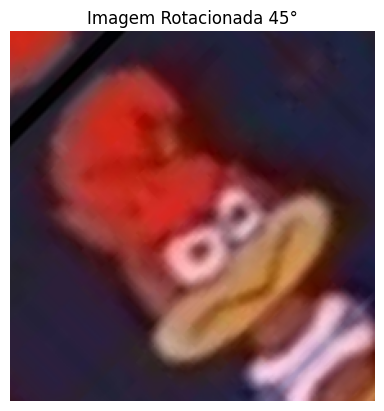

In [22]:
imagem_rotacionada_reflect = rotacionar_imagem(caminho_imagem, 45, metodo_preenchimento=cv2.BORDER_REFLECT)

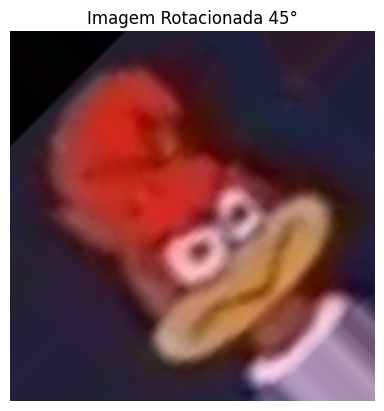

In [23]:
imagem_rotacionada_replicate = rotacionar_imagem(caminho_imagem, 45, metodo_preenchimento=cv2.BORDER_REPLICATE)

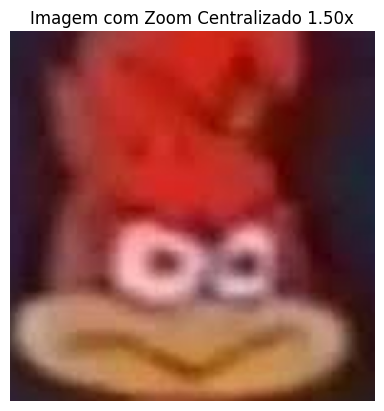

In [24]:
imagem_zoom = aplicar_zoom_centralizado(caminho_imagem, 1.5)  # Zoom in de 50%

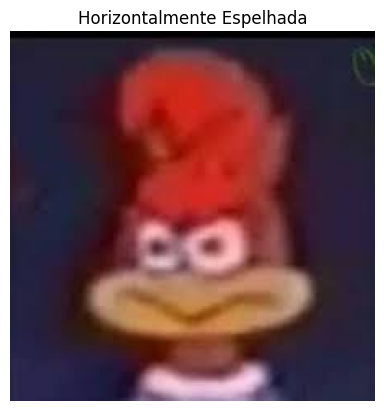

In [25]:
imagem_espelhada = espelhar_imagem(caminho_imagem, True)  # Espelhamento horizontal

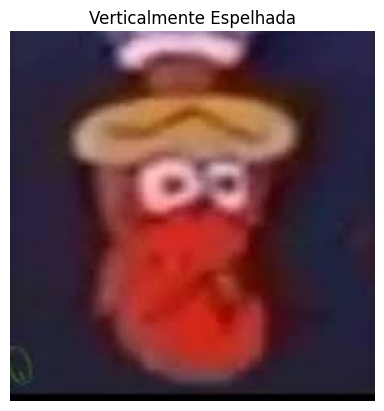

In [26]:
imagem_espelhada = espelhar_imagem(caminho_imagem, False)  # Espelhamento vertical


## 4. Conversão de Espaço de Cor

### Objetivo
A conversão de espaço de cor é uma técnica de pré-processamento que envolve mudar a representação de cor das imagens. Esta transformação é crucial para ajustar as imagens às necessidades específicas dos algoritmos de processamento e análise de imagens, facilitando a extração de características e a melhoria da performance dos modelos de visão computacional.

### Técnicas Utilizadas

#### RGB para Escala de Cinza

- **Descrição:**
  - Esta conversão reduz uma imagem RGB, que possui três canais de cor (vermelho, verde e azul), para um único canal de intensidade de cinza. Isso simplifica a análise ao reduzir a complexidade computacional dos dados.
  
- **Como Funciona:**
  - A conversão geralmente utiliza uma ponderação para cada canal de cor para refletir a luminância percebida normalmente pelo olho humano. Por exemplo, uma combinação comum é 0.2989 * R + 0.5870 * G + 0.1140 * B.
  
- **Benefícios:**
  - Diminuição significativa na quantidade de dados processados, o que pode acelerar outras operações de pré-processamento e análise.
  - Concentração na informação de luminosidade, que muitas vezes é suficiente para tarefas de reconhecimento de padrões e características.

#### RGB para YUV ou HSV

- **Descrição:**
  - Estas são conversões para espaços de cor que separam a luminância (ou intensidade) dos componentes de cor, o que pode ser extremamente útil para algumas aplicações de visão computacional e processamento de imagem.
  
- **YUV:**
  - Separa a luminância (Y) da crominância (canais U e V). Isso é particularmente útil para compressão e redução de ruído.
  
- **HSV (Matiz, Saturação, Valor):**
  - Separa a informação de cor (matiz) da intensidade (valor), com a saturação descrevendo a profundidade da cor. Este modelo é muito útil para segmentação baseada em cor e reconhecimento de objetos.
  
- **Benefícios:**
  - Facilita tipos específicos de análise de imagem, como segmentação de cor e rastreamento.
  - Permite que os modelos se concentrem nas variações de intensidade e matiz de cor independentemente do brilho, melhorando o desempenho em tarefas que são sensíveis à cor, mas não ao brilho.

In [27]:
def converter_para_cinza(caminho_imagem):
    """
    Converte uma imagem RGB para escala de cinza usando a percepção de luminância do olho humano.
    Args:
    caminho_imagem (str): Caminho para o arquivo de imagem.
    
    Returns:
    numpy.ndarray: Imagem em escala de cinza.
    """
    imagem_rgb = ler_imagem(caminho_imagem)
    # Converte para escala de cinza utilizando a fórmula de luminância
    imagem_cinza = 0.2989 * imagem_rgb[:,:,0] + 0.5870 * imagem_rgb[:,:,1] + 0.1140 * imagem_rgb[:,:,2]
    imagem_cinza = imagem_cinza.astype(np.uint8)
    
    plt.imshow(imagem_cinza, cmap='gray')
    plt.title('Imagem em Escala de Cinza')
    plt.axis('off')
    plt.show()
    
    return imagem_cinza

def converter_para_yuv(caminho_imagem):
    """
    Converte uma imagem RGB para o espaço de cor YUV.
    Args:
    caminho_imagem (str): Caminho para o arquivo de imagem.
    
    Returns:
    numpy.ndarray: Imagem no espaço de cor YUV.
    """
    imagem_rgb = ler_imagem(caminho_imagem)
    imagem_yuv = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2YUV)
    
    plt.imshow(imagem_yuv)
    plt.title('Imagem em Espaço de Cor YUV')
    plt.axis('off')
    plt.show()
    
    return imagem_yuv

def converter_para_hsv(caminho_imagem):
    """
    Converte uma imagem RGB para o espaço de cor HSV para facilitar a segmentação de cor.
    Args:
    caminho_imagem (str): Caminho para o arquivo de imagem.
    
    Returns:
    numpy.ndarray: Imagem no espaço de cor HSV.
    """
    imagem_rgb = ler_imagem(caminho_imagem)
    imagem_hsv = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2HSV)
    
    plt.imshow(imagem_hsv)
    plt.title('Imagem em Espaço de Cor HSV')
    plt.axis('off')
    plt.show()
    
    return imagem_hsv

In [28]:
caminho_imagem = 'imagens/pica_pau.jpeg'

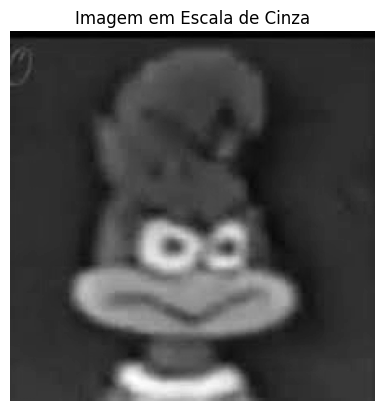

In [29]:
imagem_cinza = converter_para_cinza(caminho_imagem)

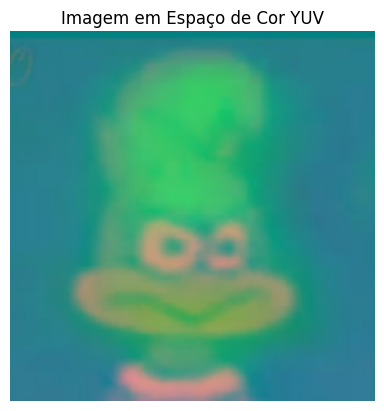

In [30]:
imagem_yuv = converter_para_yuv(caminho_imagem)

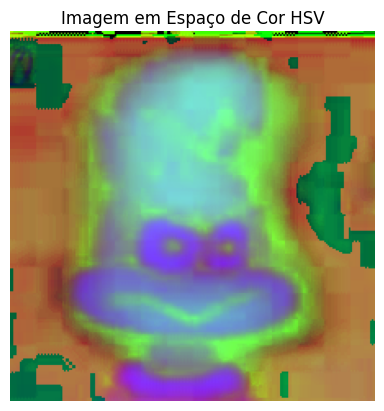

In [31]:
imagem_hsv = converter_para_hsv(caminho_imagem)

## 5. Binarização de Imagens

### Objetivo
Binarização é o processo de transformar uma imagem colorida ou em tons de cinza em uma imagem preto e branco, baseando-se em um limiar específico. Este método é fundamental em diversas aplicações de visão computacional, especialmente para simplificar a análise posterior da imagem e destacar características importantes.

### Método: Thresholding

#### Definição
- **Thresholding** ou limiarização é uma técnica simples de segmentação de imagens. Consiste em converter uma imagem em escala de cinza para uma imagem binária, onde os pixels podem ter apenas dois possíveis valores de intensidade, tipicamente 0 (preto) e 255 (branco).

#### Como Funciona
- Um valor de limiar (threshold) é escolhido, por exemplo, 128. Todos os pixels na imagem que têm valores abaixo do limiar são convertidos para 0 (preto), e todos os pixels com valores acima do limiar são convertidos para 255 (branco).

### Utilidade da Binarização

#### Remoção de Pequenos Ruídos
- Ao eliminar as variações de intensidade abaixo de um certo limiar, a binarização pode efetivamente remover pequenos ruídos presentes na imagem. Isso torna a imagem mais "limpa" para análises subsequentes.

#### Destaque de Características
- Características importantes que têm uma diferença de intensidade significativa comparada ao fundo podem ser mais facilmente detectadas após a binarização. Isso é particularmente útil em aplicações como reconhecimento de padrões e processamento de texto (OCR - Optical Character Recognition).

### Benefícios do Thresholding

- **Simplicidade:** É um método extremamente simples e rápido de processar imagens, ideal para aplicações em tempo real.
- **Eficácia:** Apesar da sua simplicidade, pode ser incrivelmente eficaz para segmentar objetos em uma imagem, especialmente em condições controladas de iluminação.
- **Versatilidade:** Pode ser utilizado em uma grande variedade de tarefas, desde a preparação de dados para OCR até a base para sistemas de reconhecimento de objetos.

In [32]:
def aplicar_binarizacao_thresholding(caminho_imagem, limiar=128):
    """
    Aplica binarização usando o método de Thresholding na imagem.
    Argumentos:
    - caminho_imagem (str): O caminho para o arquivo de imagem.
    - limiar (int): O valor do limiar para definir o corte entre preto e branco.
    
    Retorna:
    - numpy.ndarray: A imagem binarizada.
    """
    # Carrega a imagem em escala de cinza
    imagem_cinza = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

    
    # Aplica thresholding para binarizar a imagem
    _, imagem_binarizada = cv2.threshold(imagem_cinza, limiar, 255, cv2.THRESH_BINARY)
    
    # Mostra a imagem binarizada
    plt.imshow(imagem_binarizada, cmap='gray')
    plt.title(f'Imagem Binarizada com Limiar {limiar}')
    plt.axis('off')  # Não mostrar os eixos
    plt.show()
    
    return imagem_binarizada

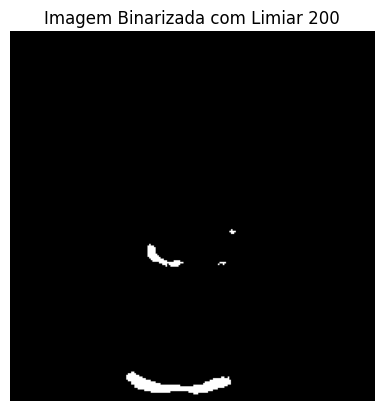

In [33]:
imagem_binarizada = aplicar_binarizacao_thresholding(caminho_imagem, 200)

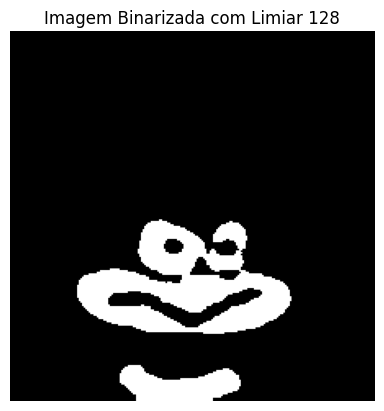

In [34]:
imagem_binarizada = aplicar_binarizacao_thresholding(caminho_imagem, 128)

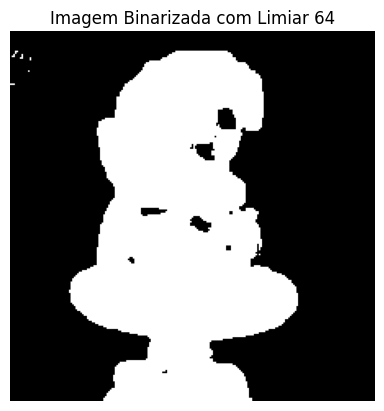

In [35]:
imagem_binarizada = aplicar_binarizacao_thresholding(caminho_imagem, 64)

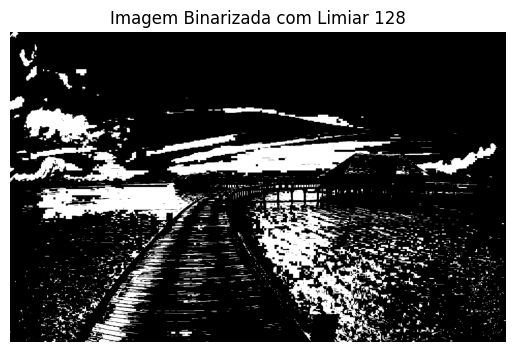

In [36]:
imagem_binarizada = aplicar_binarizacao_thresholding('imagens/paisagem.jpg', 128)

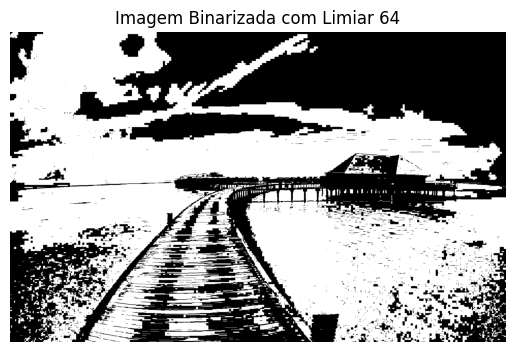

In [37]:
imagem_binarizada = aplicar_binarizacao_thresholding('imagens/paisagem.jpg', 64)

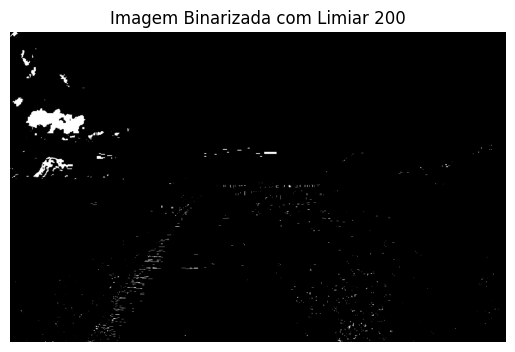

In [38]:
imagem_binarizada = aplicar_binarizacao_thresholding('imagens/paisagem.jpg', 200)

## 6. Detecção de Bordas

### Objetivo
A detecção de bordas é uma técnica crucial no pré-processamento de imagens para identificar pontos numa imagem digital onde a intensidade de luminância muda drasticamente. Estas mudanças são usadas para marcar limites significativos de objetos numa imagem, o que é vital para diversas aplicações de visão computacional e reconhecimento de padrões.

### Métodos: Operadores de Gradiente

#### Sobel Operator
- **Descrição:**
  - O operador Sobel detecta bordas horizontais e verticais separadamente ou em conjunto. Utiliza dois conjuntos de máscaras convolucionais (3x3) que são aplicadas à imagem para calcular aproximações do gradiente horizontal e vertical.
- **Utilização:**
  - Ideal para ambientes com variação de textura moderada onde as bordas são mais definidas.

#### Prewitt Operator
- **Descrição:**
  - Semelhante ao Sobel, o operador Prewitt também utiliza máscaras convolucionais para detectar bordas horizontais e verticais. No entanto, as máscaras do Prewitt são configuradas de maneira diferente para dar uma resposta ligeiramente mais suavizada em comparação com o Sobel.
- **Utilização:**
  - Utilizado quando as bordas na imagem são menos abruptas.

#### Roberts Operator
- **Descrição:**
  - O operador de Roberts aplica um par de máscaras convolucionais 2x2 que são menos sensíveis ao ruído, mas também menos precisas na localização de bordas em comparação com Sobel e Prewitt.
- **Utilização:**
  - Boa escolha para imagens com alto nível de ruído onde a robustez é prioritária sobre a precisão na detecção de bordas.

#### Canny Edge Detector
- **Descrição:**
  - Considerado um dos detectores de borda mais robustos, o Canny utiliza um algoritmo multi-etapa que inclui suavização com um filtro Gaussiano, detecção de gradientes, aplicação de um duplo limiar (thresholding) e rastreamento de bordas por histerese.
- **Utilização:**
  - Recomendado para situações onde é necessária alta precisão na detecção de bordas e a robustez contra ruído é crucial.

### Importância da Detecção de Bordas

- **Identificação de Formas e Contornos:**
  - As bordas formam a base para o reconhecimento de objetos e a segmentação de formas dentro de uma imagem, facilitando tarefas mais complexas de visão computacional.
  
- **Melhoria na Análise de Imagens:**
  - Ao destacar as bordas, reduz-se significativamente a quantidade de dados a serem processados para análises subsequentes, permitindo foco nas características mais importantes.

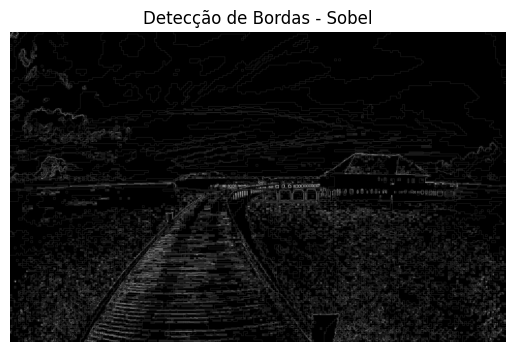

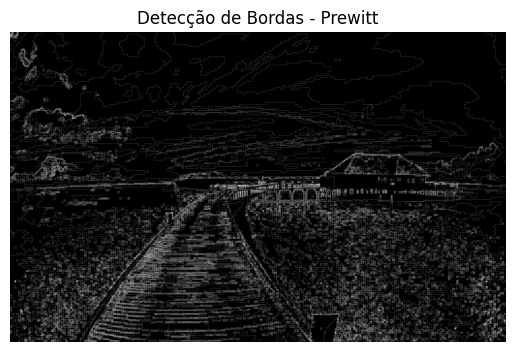

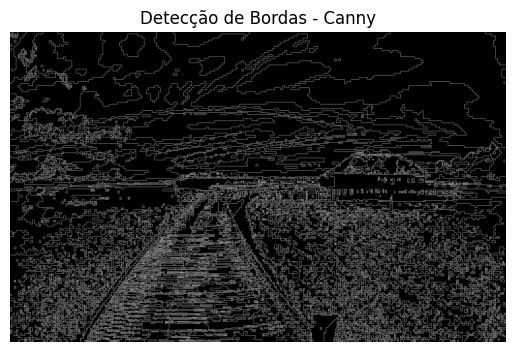

In [39]:
def detectar_bordas_sobel(caminho_imagem):
    """
    Aplica o operador de Sobel para detectar bordas na imagem.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    
    Retorna:
    - numpy.ndarray: Imagem resultante com as bordas destacadas.
    """
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    # Calcula os gradientes horizontal e vertical
    grad_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)
    # Combina os gradientes horizontal e vertical
    sobel = cv2.magnitude(grad_x, grad_y)
    plt.imshow(sobel, cmap='gray')
    plt.title('Detecção de Bordas - Sobel')
    plt.axis('off')
    plt.show()
    return sobel

def detectar_bordas_prewitt(caminho_imagem):
    """
    Aplica o operador de Prewitt para detectar bordas na imagem.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    
    Retorna:
    - numpy.ndarray: Imagem resultante com as bordas destacadas.
    """
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    # Define Prewitt kernels
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    # Filter the image using filter2D, which applies a convolution.
    grad_x = cv2.filter2D(imagem, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(imagem, cv2.CV_64F, kernel_y)
    
    # Convert gradients to absolute values and then to 8-bit unsigned integers
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    
    # Combine gradients using cv2.addWeighted method to obtain final edge detected image
    prewitt = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    plt.imshow(prewitt, cmap='gray')
    plt.title('Detecção de Bordas - Prewitt')
    plt.axis('off')
    plt.show()
    
    return prewitt

def detectar_bordas_canny(caminho_imagem, limiar_baixo=50, limiar_alto=150):
    """
    Aplica o detector de bordas Canny para identificar bordas na imagem.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    - limiar_baixo (int): Limiar baixo para o processo de histerese.
    - limiar_alto (int): Limiar alto para o processo de histerese.
    
    Retorna:
    - numpy.ndarray: Imagem resultante com as bordas destacadas.
    """
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    # Aplica o detector de bordas Canny
    canny = cv2.Canny(imagem, limiar_baixo, limiar_alto)
    plt.imshow(canny, cmap='gray')
    plt.title('Detecção de Bordas - Canny')
    plt.axis('off')
    plt.show()
    return canny

caminho_imagem = 'imagens/paisagem.jpg'

bordas_sobel = detectar_bordas_sobel(caminho_imagem)
bordas_prewitt = detectar_bordas_prewitt(caminho_imagem)
bordas_canny = detectar_bordas_canny(caminho_imagem)

## Padrão Binário Local (Local Binary Patterns - LBP)

### O que é LBP?

O **Padrão Binário Local (LBP)** é um descritor de textura poderoso e eficiente, conhecido por sua capacidade de classificar texturas na área de visão computacional. Originado na análise de texturas, o LBP é amplamente utilizado para reconhecimento facial e outras tarefas de reconhecimento de padrões em imagens.

### Como Funciona?

O LBP funciona por meio de um método simples, porém robusto:

- Para cada pixel na imagem, um bairro (geralmente de tamanho 3x3) é considerado.
- O pixel central do bairro é comparado com seus vizinhos.
- Para cada vizinho, um bit de um novo número binário é atribuído: 1 se o vizinho é maior ou igual ao pixel central, e 0 se é menor.
- Os bits atribuídos aos vizinhos são então combinados em um número binário (ou padrão binário), e este número é usado para representar o pixel central.

### Vantagens do LBP

- **Robustez a Mudanças de Iluminação:** O LBP é invariante a mudanças de iluminação, uma vez que compara apenas os valores relativos de luminância.
- **Eficiência Computacional:** Devido à sua simplicidade, o LBP pode ser calculado rapidamente, tornando-o adequado para sistemas em tempo real.
- **Adaptabilidade:** O LBP pode ser facilmente modificado e adaptado para melhor atender às necessidades específicas de diferentes aplicações e melhorias de desempenho.

### Aplicações

- **Reconhecimento Facial:** O LBP é amplamente utilizado no reconhecimento facial, onde padrões de textura da pele são importantes para identificar indivíduos.
- **Análise de Movimento:** Usado para detectar movimentos através de mudanças nos padrões de textura.
- **Segmentação de Imagens:** O LBP pode ajudar a segmentar diferentes partes de uma imagem com base nas texturas.

O LBP tem se mostrado uma ferramenta valiosa na visão computacional, ajudando na extração eficiente de informações úteis de imagens, o que facilita uma variedade de tarefas de reconhecimento e análise.


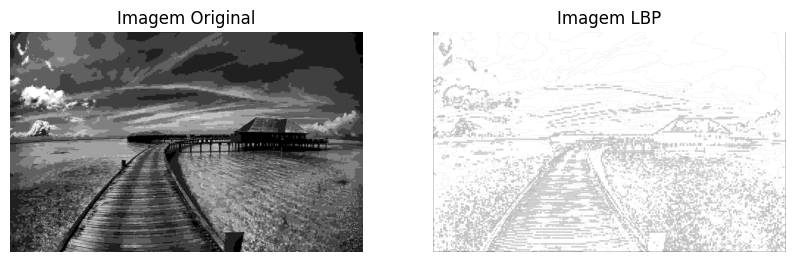

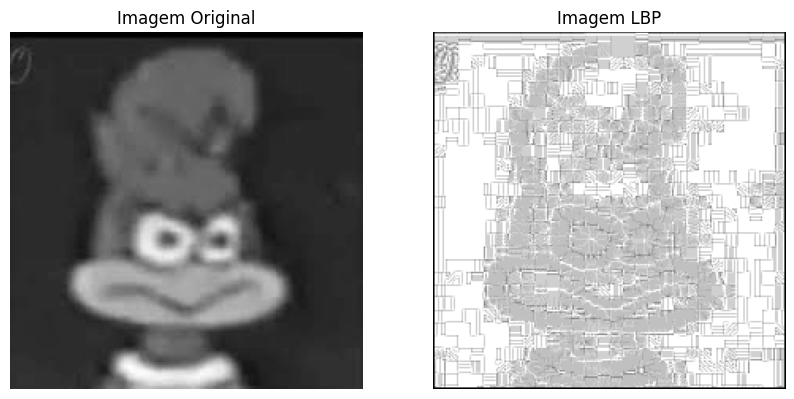

In [40]:
def calcular_lbp(caminho_imagem):
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
    """
    Calcula o Local Binary Pattern de uma imagem.
    Argumentos:
    - imagem (numpy.ndarray): A imagem de entrada em escala de cinza.
    
    Retorna:
    - numpy.ndarray: A imagem LBP.
    """
    lbp = np.zeros_like(imagem)
    neigh = np.array([[1,  1,  1],
                      [1, -8,  1],
                      [1,  1,  1]])
    
    for i in range(1, imagem.shape[0] - 1):
        for j in range(1, imagem.shape[1] - 1):
            center = imagem[i, j]
            binary = (imagem[i-1:i+2, j-1:j+2] >= center)
            binary[1, 1] = 0  # Reset the center value
            value = (binary * neigh).sum() + 8
            lbp[i, j] = value

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title('Imagem LBP')
    plt.axis('off')
    plt.show()

imagem_lbp = calcular_lbp(caminho_imagem)
imagem_lbp = calcular_lbp('imagens/pica_pau.jpeg')

## 7. Filtragem de Imagens

### Objetivo
O objetivo da filtragem de imagens é suavizar, realçar, ou remover ruídos de uma imagem. Filtragem é uma técnica crucial no pré-processamento de imagens para melhorar a qualidade visual das imagens ou para prepará-las para análises computacionais e operações de nível superior, como detecção de bordas e reconhecimento de padrões.

### Métodos de Filtragem Utilizados

#### Filtros Gaussianos

- **Descrição:**
  - O filtro Gaussiano é utilizado para suavizar a imagem e reduzir detalhes e ruídos. Ele funciona convolvendo a imagem com um kernel Gaussiano que representa uma função Gaussiana (curva em forma de sino).
  
- **Aplicações:**
  - Útil para remover ruídos e suavizar texturas dentro de uma imagem sem perder demasiados detalhes de bordas.
  
#### Filtros de Média

- **Descrição:**
  - Este filtro suaviza a imagem substituindo cada pixel pela média dos pixels em sua vizinhança definida pelo kernel. O filtro de média é um exemplo simples de um filtro passa-baixa.
  
- **Aplicações:**
  - Bom para reduzir ruído aleatório da imagem, especialmente útil em imagens onde o ruído é distribuído uniformemente.

#### Filtros de Mediana

- **Descrição:**
  - Similar ao filtro de média, mas substitui cada pixel pelo valor mediano dos pixels no kernel ao invés da média. Isso ajuda a preservar bordas nítidas na imagem enquanto ainda reduz o ruído.
  
- **Aplicações:**
  - Eficiente para remover ruído de "sal e pimenta" e é frequentemente usado em aplicações de processamento de imagem digital onde a preservação de bordas é crucial.

### Benefícios da Filtragem

- **Suavização de Imagem:**
  - Ajuda a reduzir a variação de intensidade entre os pixels, o que pode facilitar a segmentação e outras operações de processamento de imagem.
  
- **Remoção de Ruído:**
  - Elimina variações indesejadas de pixel que não são parte do objeto de interesse na imagem, o que melhora a análise visual e computacional.
  
- **Preparação para Operações de Nível Superior:**
  - Imagens que são suavizadas e livres de ruídos são mais fáceis de processar em tarefas subsequentes como detecção de bordas e reconhecimento de padrões, pois as características irrelevantes são minimizadas.

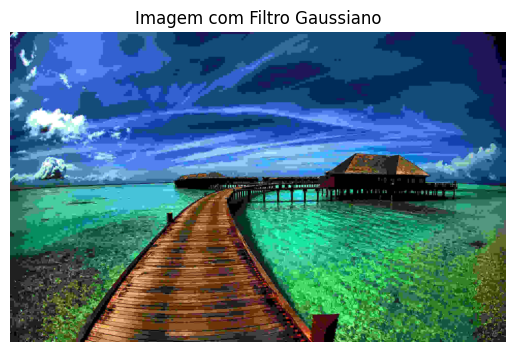

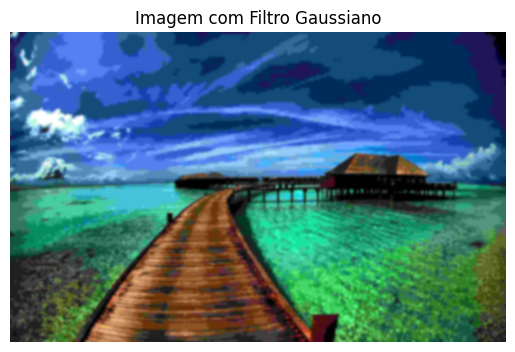

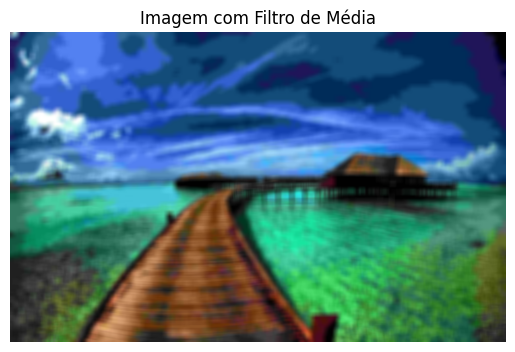

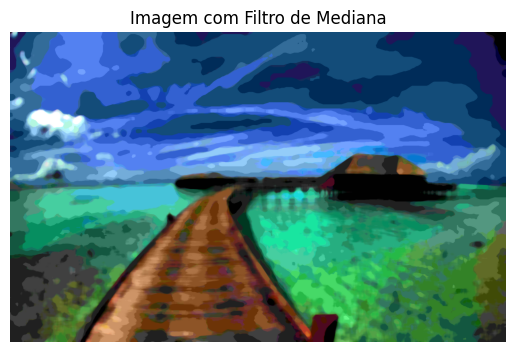

In [41]:
def aplicar_filtro_gaussiano(caminho_imagem, tamanho_kernel=5):
    """
    Aplica um filtro Gaussiano para suavizar a imagem.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    - tamanho_kernel (int): Tamanho do kernel Gaussiano; deve ser um número ímpar.
    
    Retorna:
    - numpy.ndarray: A imagem suavizada.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem_suavizada = cv2.GaussianBlur(imagem, (tamanho_kernel, tamanho_kernel), 0)
    
    plt.imshow(imagem_suavizada)
    plt.title('Imagem com Filtro Gaussiano')
    plt.axis('off')
    plt.show()
    
    return imagem_suavizada

def aplicar_filtro_media(caminho_imagem, tamanho_kernel=5):
    """
    Aplica um filtro de média para reduzir o ruído na imagem.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    - tamanho_kernel (int): Tamanho do kernel; deve ser um número ímpar.
    
    Retorna:
    - numpy.ndarray: A imagem com ruído reduzido.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem_suavizada = cv2.blur(imagem, (tamanho_kernel, tamanho_kernel))
    
    plt.imshow(imagem_suavizada)
    plt.title('Imagem com Filtro de Média')
    plt.axis('off')
    plt.show()
    
    return imagem_suavizada

def aplicar_filtro_mediana(caminho_imagem, tamanho_kernel=5):
    """
    Aplica um filtro de mediana para reduzir o ruído.
    Argumentos:
    - caminho_imagem (str): Caminho para o arquivo de imagem.
    - tamanho_kernel (int): Tamanho do kernel; deve ser um número ímpar.
    
    Retorna:
    - numpy.ndarray: A imagem com ruído reduzido.
    """
    imagem = ler_imagem(caminho_imagem)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem_suavizada = cv2.medianBlur(imagem, tamanho_kernel)
    
    plt.imshow(imagem_suavizada)
    plt.title('Imagem com Filtro de Mediana')
    plt.axis('off')
    plt.show()
    
    return imagem_suavizada

caminho_imagem = 'imagens/paisagem.jpg'
imagem_gauss = aplicar_filtro_gaussiano(caminho_imagem, 1)
imagem_gauss = aplicar_filtro_gaussiano(caminho_imagem, 25)
imagem_media = aplicar_filtro_media(caminho_imagem, 25)
imagem_mediana = aplicar_filtro_mediana(caminho_imagem, 25)

# Exercício de Processamento de Imagens

## Objetivo

Este exercício visa aplicar várias técnicas de processamento de imagens em um conjunto de dados organizado de imagens de animais. As imagens serão transformadas usando diferentes métodos e salvas em pastas correspondentes para análise futura.

## Estrutura de Diretórios

- **imagens/**
  - **animais/**
    - **nome_do_animal/** (aproximadamente 130 imagens cada)

## Tarefas de Processamento

### 1. Preparação das Imagens

Primeiramente, você deverá ler todas as imagens na pasta `animais`, redimensionar cada imagem para 70x70 pixels e converter para escala de cinza. 

- **Saída Esperada:**
  - Salve estas imagens na pasta `animais_preto_branco`, preservando a organização em subpastas por animal.

### 2. Binarização das Imagens

Após redimensionar, aplique a técnica de binarização com um threshold de 128 nas imagens coloridas originais redimensionadas.

- **Saída Esperada:**
  - Crie e salve essas imagens na pasta `animais_binarizados_threshold_128`, mantendo a estrutura de subpastas por animal.

### 3. Detecção de Bordas

Utilize o operador de Prewitt para detectar bordas nas imagens coloridas redimensionadas.

- **Saída Esperada:**
  - Salve os resultados na pasta `animais_bordas_prewitt`.

### 4. Local Binary Patterns (LBP)

Calcule o Local Binary Pattern para cada imagem na escala de cinza e salve os resultados.

- **Saída Esperada:**
  - As imagens processadas devem ser armazenadas na pasta `animais_lbp`.

### 5. Filtro de Mediana

Aplique um filtro de mediana nas imagens em escala de cinza para suavizar a imagem preservando as bordas.

- **Saída Esperada:**
  - Salve estas imagens na pasta `animais_filtro_mediana`.

### 6. Filtro de Média

Finalmente, aplique um filtro de média para suavizar as imagens em escala de cinza.

- **Saída Esperada:**
  - As imagens resultantes devem ser guardadas na pasta `animais_filtro_media`.

``Este exercício é para ser apresentado até terça feira que vem e irá compor parte da nota de exercícios.``